In [1]:
# importing functions for analysis
# I find I have to run this cell twice to get nice, large plots
from functions import *
from sim_functions import *

Welcome to JupyROOT 6.16/00


# Simulations with PENTrack

In this notebook, simulation results from PENTrack are used in conjection with the experimental analysis in order to determine various material parameters.

## Questions

- what is an apporpriate number for simulated particles. Right now I'm achievuing only 10000 simulated particles (due to time-out issues) and less than 2000 are making it to the detector. Contrast that with experiment, where ~100000 are being detected in an equivalent run. 
- I should be able to just judge based on whatever error bar I get from each method, is the error on the fit parameter p1 correct? Is the built-in 'expo' function what you would use for this fit? If I can demonstrate a lack of agreement, or a lack of sensitivity to changes in drp, from just 10000 simulated particles, then we can move on right? 
- What do we move on to? If we're not able to budge this time constant by changing drp, then should I start changing imaginary fermi? This I would use to match just to pre-storage time, right? 
- Review my materials.in to make sure I'm setting things appropriately (where I 0'ed the other parameters in order to change drp)

## Direction
- Generate a function that takes as input the pre-storage time, and the configuration (to begin with, only TRIUMF-style), then it produces the drp1 and drp10 exponential fits (as shown below) using ROOT. For this it requires only the out.ROOT files, named strategically.
- Put the time constant analysis notebook in here, where it belongs.
- refactor the configuration naming scheme everywhere into something that makes more sense

## Scratch

The new directory structure. There should be a sim_data directory that contains only approproately named out.root files.

# Diffuse Reflection Probability Analysis

INFO:ROOT.TCanvas.Print:pdf file TR_norm_5s_drp10.pdf has been created
 FCN=334.556 FROM MIGRAD    STATUS=CONVERGED      71 CALLS          72 TOTAL
                     EDM=3.04934e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.85187e+00   1.93857e-01   2.63273e-04   2.18592e-02
   2  Slope       -9.52377e-02   5.65651e-03   7.68166e-06   8.18645e-01


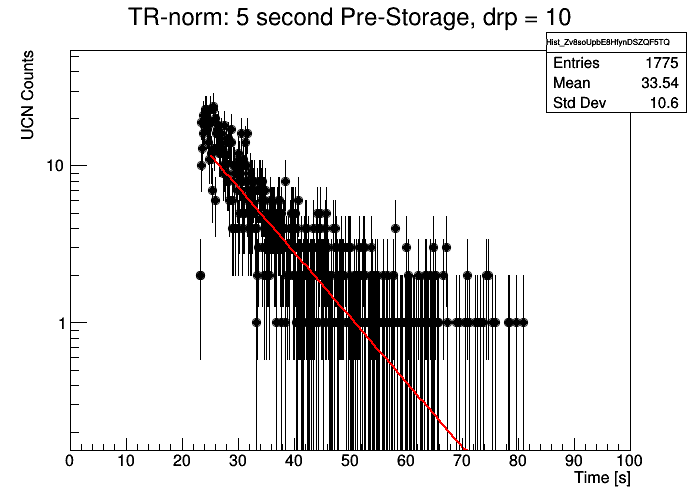

In [11]:
f = root_open('../data_sim/NOMI_005s_dp10.root')
# end is a TNtupleD object, which is a type of TTree
end = f.Get('neutronend')
# from ROOT import gStyle
# gStyle.SetPalette(51);
# using rootpy to define the histogram
h1 = Hist(4000, 0, 400)
# TH1F h("h", "h", 64, -10, 10);
# a = end.GetEntry(22)
# for i in range(0, end.GetEntries()):
#     entry = end.GetEnry(i)
#     print(entry)
#    auto xyzt = myntuple->GetArgs(); // Get a row
#    if (xyzt[2] > 0) h.Fill(xyzt[0] * xyzt[1]);
canvas = Canvas(width=700, height=500)
# c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
for evt in f.neutronend:
   if evt.solidend == 200: h1.Fill(evt.tend)

# h1.GetYaxis().SetRangeUser(0, 50)
h1.GetXaxis().SetRangeUser(0, 100)
# h1.SetMarkerColorAlpha(kBlue)
# h1.SetMarkerStyle(22)
h1.Draw("hist")
canvas.Draw()
canvas.SetLogy()

# fitting
f1 = ROOT.TF1("m1","expo",25,80)
f1.SetParameters(7,-0.2)
fit = h1.Fit(f1, 'SR')
h1.SetTitle('TR-norm: 5 second Pre-Storage, drp = 10')
h1.GetXaxis().SetTitle('Time [s]')
h1.GetYaxis().SetTitle('UCN Counts')
h1.Draw()
canvas.Print('TR_norm_5s_drp10.pdf')